# Shuttle Beam

Shuttle body with longitudinal etch-hole array. The central moving structure of the MEMS actuator.

In [1]:
import sys
sys.path.insert(0, "../../libraries")

import gdsfactory as gf
from mcw_custom_optical_mems_pdk import LAYER, PDK

PDK.activate()


def make_etch_hole(size=10.0, margin=0.5, layer=LAYER.POLY_MEMS):
    """Single square etch hole with margin offset from origin.

    Args:
        size:   Side length of the hole (um).
        margin: Offset from (0,0) so the hole is inset within a grid cell.
        layer:  GDS layer for the hole polygon.

    Returns:
        gf.Component with one square polygon.
    """
    c = gf.Component()
    c.add_polygon(
        [(margin, margin),
         (margin + size, margin),
         (margin + size, margin + size),
         (margin, margin + size)],
        layer=layer,
    )
    return c

In [2]:
def make_shuttle(
    n_holes: int = 14,
    hole_size: float = 5.0,
    hole_margin: float = 1.0,
    hole_pitch: float = 6.5,
    top_margin: float = 1.0,
    layer=LAYER.POLY_MEMS,
):
    """Shuttle body with longitudinal etch-hole array.

    The outline width and height are derived from the hole parameters:
        width  = hole_size + 2 * hole_margin
        height = (n_holes - 1) * hole_pitch + hole_size + hole_margin + top_margin

    Args:
        n_holes:     Number of etch holes along the shuttle length.
        hole_size:   Side length of each square etch hole (um).
        hole_margin: Minimum margin between hole edge and shuttle edge (um).
        hole_pitch:  Center-to-center spacing of etch holes (um).
        top_margin:  Extra margin at the top of the shuttle (um).
        layer:       GDS layer.

    Returns:
        gf.Component of the shuttle (outline minus etch holes).
    """
    width  = hole_size + 2 * hole_margin
    height = (n_holes - 1) * hole_pitch + hole_size + hole_margin + top_margin

    outline = gf.Component()
    outline.add_polygon(
        [(0, 0), (width, 0), (width, height), (0, height)],
        layer=layer,
    )

    etch_hole = make_etch_hole(size=hole_size, margin=hole_margin, layer=layer)

    holes = gf.Component()
    holes.add_ref(etch_hole, columns=1, rows=n_holes,
                  column_pitch=hole_pitch, row_pitch=hole_pitch)

    shuttle = gf.boolean(
        A=outline, B=holes, operation="not",
        layer1=layer, layer2=layer, layer=layer,
    )
    return shuttle

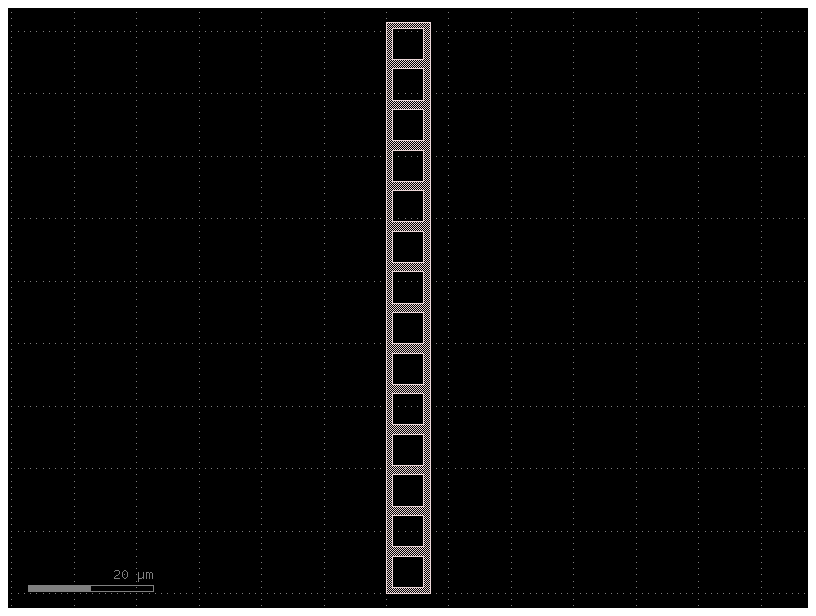

In [3]:
shuttle = make_shuttle()
shuttle.plot()